# Change of Measure,Convexity and Linear Rate Model


In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats
from scipy.interpolate import interp1d
import math
import scipy.integrate as integrate
from scipy.stats import norm
from scipy.stats import lognorm
import random
% matplotlib inline

UsageError: Line magic function `%` not found.


## Model free part

### Tradable Securities

- Stock $S_t$ with contionous dividend $r^{div}_t$ and repo rate $r^{repo}_t$ that grows at a rate $(r^{repo}_t-r^{div}_t)$ under the measure Q. 
- Zerobonds $P^x(t,T)=E^Q(\exp(-\int_t^T r^x_s ds))$
- Bank account $B^x(t)= \exp(\int_0^t r^x_s ds)$     

in a HJM framework driven by short rates $r^C_t\leq r^{repo}_t \leq r^F_t$ under the measure Q. 

Note: The numeraire corresponding to Q is not clear!



#### Two measures $Q^C_T$ and $Q^F_T$


##### Forward measure risk free rate $r_C$



- with numeraire $P^C(t,T) = E^Q(exp(-\int^T_t r^c_t dt)|\mathcal{F_t})$

- and transformation $\left. \frac{dQ}{dP^C_T}\right|_{t} = \frac{B^C(t)}{P^C(t,T)}= E^Q(\frac{B^C(T)}{P^C(T,T)}|\mathcal{F_t})$ (Note that this is a $Q$-Martingale)

- $V^{CSA}(t,T)=B^C(t)E^Q(\frac{V_T}{B^C(T)}|\mathcal{F_t})=P^C(t,T)E^{Q^C_T}(\frac{V_T}{P^C(T,T)}|\mathcal{F_t})$

- $ V_t^{CSA} =(S_T-F^{CSA}(t,T)) = 0$   implies   $F^{CSA}(t,T)=E^{Q^C_T}(S_T|\mathcal{F_t}) $


##### Forward measure funding rate $r_F$

- with numeraire $P^F(t,T) = E^Q(exp(-\int^T_t r^f_t dt)|\mathcal{F_t})$
- and transformation $\left. \frac{dQ}{dP^F_T}\right|_{t} = \frac{B^F(t)}{P^F(t,T)}= E^Q(\frac{B^F(T)}{P^F(T,T)}|\mathcal{F_t})$ Note that this is a $Q$-Martingale

- $V^{CSA}(t,T)=B^F(t)E^Q(\frac{V_T}{B^F(T)}|\mathcal{F_t})=P^F(t,T)E^{Q^F_T}(\frac{V_T}{P^F(T,T)}|\mathcal{F_t})$

- $ V_T^{CSA} =(S_T-F^{CSA}(t,T))$ implies $F^{CSA}(t,T)=E^{Q^F_T}(S_T|\mathcal{F_t}) $


##### Measure transformation between $Q^C_T$ and $Q^F_t$

$ M(t,T)=\left. \frac{dQ^F_T}{dQ^C_T}\right|_{t}= \frac{P^F(t,T)}{P^C(t,T)}=E^{Q^C_T}(\frac{P^F(T,T)}{P^C(T,T)}|\mathcal{F_t})$ is a $Q^C_T$-Matringale

Now introduce funding spread $s^F_t = r^F_t - r^C_t$

$ M(t,T)=\left. \frac{dQ^F_T}{dQ}\right|_{t} \left. \frac{dQ}{dQ^C_T}\right|_{t}=\frac{P^F(t,T)}{B^C_t\exp{(-\int_0^t s^F_t dt)}}\frac{B^C_t}{P^C(t,T)}=\frac{P^F(t,T)}{P^C(t,T)} \exp (\int^t_0 s^F_t dt)$



$V^{NoCSA}(t,T)=P^F(t,T)E^{Q^F_T}(\frac{V_T}{P^F(T,T)}|\mathcal{F_t})=P^F(t,T)\left. \frac{dQ^F_T}{dQ^C_T}\right|_{t}^{-1} E^{Q^C_T} (\left. \frac{dQ^F_T}{dQ^C_T}\right|_{T} \frac{V_T}{P^F(T,T)})$ 

##### Expectation of  $S_T$ under measure trafo

$F^{NoCSA}(t,T)=E^{Q^F_T}(S_T|\mathcal{F_t})=E^{Q^C_T}(\frac{M(T,T)}{M(t,T)}S_T|\mathcal{F_t})$ 



$F^{NoCSA}(t,T)=\frac{Cov^{Q^C_T}(M(T,T)S_T|\mathcal{F_t})+E^{Q^C_T}(M(T,T))E^{Q^C_T}(S_T) }{M(t,T)}$ Note that $E^{Q^C_T}(\frac{M(T,T)}{M(t,T)}|\mathcal{F_t})=1$ because Martingale

$F^{NoCSA}(t,T)=Cov^{Q^C_T}(\frac{M(T,T)}{M(t,T)}S_T|\mathcal{F_t})+E^{Q^C_T}(S_T|\mathcal{F_t}) $ 

$F^{NoCSA}(t,T)= F^{CSA}(t,T)+Cov^{Q^C_T}(\frac{M(T,T)}{M(t,T)}S_T|\mathcal{F_t}) $ 

##### Distribution of $S_T$ under measure $Q^F_T$
$Q^F_T(S_T \in A|\mathcal{F_t}) =E^{Q^C_T}(\frac{M(T,T)}{M(t,T)}S_T|\mathcal{F_t})= \int_{S_T \in A}\int_{s^F_T \in \mathbb{R}} \frac{M(T,T)}{M(t,T)}S_T \cdot p^{Q^C_T}_{S_T,s^F_T}(s,s^F) ds^Fds= \int_{S_T \in A}S_T[\int_{s^F_T \in \mathbb{R}} \frac{M(T,T)}{M(t,T)} \cdot p^{Q^C_T}_{S_T,s^F_T}(s,s^F) ds^F]ds$





##### Linear Approximation of measure $Q^F_T$

Assume that $ E^{Q^C_T}(\frac{M(T,T)}{M(t,T) }|\mathcal{F_t}) \approx E^{Q^C_T}(\frac{M(T,T)}{M(t,T) }|S_T) $ i.e. information conveied by funding spread $s^F_t$ is discarded

Assume that $E^{Q^C_T}(\frac{M(T,T)}{M(t,T) }|S_T)\approx (\alpha_0(t,T) + \alpha_1(t,T) S_T) $ i.e. linear approxomation

$F^{NoCSA}(t,T)=E^{Q^C_T}(\frac{M(T,T)}{M(t,T) }S_t|\mathcal{F_t})=E^{Q^C_T}(E^{Q^C_T}(\frac{M(T,T)}{M(t,T) }|\mathcal{F_t})S_t|\mathcal{F_t})\approx E^{Q^C_T}((\alpha_0(t,T) + \alpha_1(t,T) S_T) S_T|\mathcal{F_t})$



where $\left(\begin{matrix}a_0(t,T)\\a_1(t,T)\end{matrix}\right)= argmin_{(a_0,a_1)} \lVert\frac{M(T,T)}{M(t,T)}-\alpha_0(t,T) - \alpha_1(t,T) S_T |\mathcal{F_t})\rVert_2 = argmin_{(a_0,a_1)}(Var^{Q^C_T}(\frac{M(T,T)}{M(t,T)}-\alpha_0(t,T) - \alpha_1(t,T) S_T |\mathcal{F_t}))$

Calculate the RN-derivative by orthogonal projection

$(\frac{M(T,T)}{M(t,T)}-\alpha_0(t,T) - \alpha_1(t,T) S_T) \bot span\{1,S_T\}$



$\left(\begin{matrix} 0\\0 \end{matrix}\right) =E^{Q^C_T}(\left(\begin{matrix}1 & 0\\0 &S_T\end{matrix}\right)\left(\begin{matrix} \frac{M(T,T)}{M(t,T)}-\alpha_0(t,T) - \alpha_1(t,T) S_T\\\frac{M(T,T)}{M(t,T)}-\alpha_0(t,T) - \alpha_1(t,T) S_T \end{matrix}\right)|\mathcal{F_t})$

$\left(\begin{matrix} 0\\0 \end{matrix}\right) =\left(\begin{matrix} E^{Q^C_T}(\frac{M(T,T)}{M(t,T)}|\mathcal{F_t})-E^{Q^C_T}(\alpha_0(t,T)|\mathcal{F_t}) - E^{Q^C_T}(\alpha_1(t,T) S_T|\mathcal{F_t})\\E^{Q^C_T}(\frac{M(T,T)}{M(t,T)}S_T|\mathcal{F_t})-E^{Q^C_T}(\alpha_0(t,T)S_T|\mathcal{F_t}) - E^{Q^C_T}(
\alpha_1(t,T) S_T^2|\mathcal{F_t}) \end{matrix}\right)$

$\left(\begin{matrix} E^{Q^C_T}(\frac{M(T,T)}{M(t,T)}|\mathcal{F_t})\\E^{Q^C_T}(\frac{M(T,T)}{M(t,T)}S_T|\mathcal{F_t}) \end{matrix}\right) =\left(\begin{matrix} E^{Q^C_T}(1|\mathcal{F_t}) & E^{Q^C_T}( S_T|\mathcal{F_t})\\E^{Q^C_T}(S_T|\mathcal{F_t}) & E^{Q^C_T}(S_T^2|\mathcal{F_t}) \end{matrix}\right) \left(\begin{matrix} \alpha_0(t,T)\\\alpha_1(t,T) \end{matrix}\right)$

$\left(\begin{matrix} \alpha_0(t,T)\\\alpha_1(t,T) \end{matrix}\right)
=\left(\begin{matrix} E^{Q^C_T}(1|\mathcal{F_t}) & E^{Q^C_T}( S_T|\mathcal{F_t})\\E^{Q^C_T}(S_T|\mathcal{F_t}) & E^{Q^C_T}(S_T^2|\mathcal{F_t}) \end{matrix}\right)^{⁻1}\left(\begin{matrix} E^{Q^C_T}(\frac{M(T,T)}{M(t,T)}|\mathcal{F_t})\\E^{Q^C_T}(\frac{M(T,T)}{M(t,T)}S_T|\mathcal{F_t}) \end{matrix}\right)$

$\left(\begin{matrix} \alpha_0(t,T)\\\alpha_1(t,T) \end{matrix}\right)=\left(\begin{matrix} 1 &F^{CSA}(t,T))\\F^{CSA}(t,T)) & E^{Q^C_T}(S_T^2|\mathcal{F_t}) \end{matrix}\right)^{⁻1}\left(\begin{matrix} 1\\F^{NoCSA}(t,T) \end{matrix}\right) $

missing ...

$\left(\begin{matrix} \alpha_0(t,T)\\\alpha_1(t,T) \end{matrix}\right)
=\left(\begin{matrix} 1-\alpha_1(t,T)F^{NoCSA}(t,T)\\\frac{F^{NoCSA}(t,T)-F^{CSA}(t,T)}{Var^{Q^C_t}(S_T)} \end{matrix}\right)=\left(\begin{matrix} 1-\alpha_1(t,T)F^{NoCSA}(t,T)\\\frac{F^{NoCSA}(t,T)-F^{CSA}(t,T)}{\exp((\sigma^S)^2-1)F^{CSA}(t,T)^2} \end{matrix}\right)$

## Now introduce model

No dividends

Drift of $S_t$ is repo rate!  What is the numeraire? 

$dS_t=S_t(r^{repo}_t dt-\sigma^SdW^S_t);W^S_t$ ist $Q$-BM

$ds^F_t = (\theta(t) - a r^F_t)dt + \sigma^F dW^{s^F}_t;W^{s^F}_t$ ist $Q-BM$

$dW^S_tdW^{Q^{s^F}}_t=\rho dt$

$r^C = const$

$r^{repo} = const$

$r^{div}=0$

### Measure trafo



$F^{NoCSA}(t,T)= E^{Q^C_T}(\frac{M(T,T)}{M(t,T)}S_T|\mathcal{F_t}) $ and

$ M(t,T)=\frac{P^F(t,T)}{P^C(t,T)} \exp (\int^t_0 s^F_t dt)=\frac{E^Q(\exp(-\int^T_t r^F_t dt|\mathcal{F_t}))}{E^Q(\exp(-\int^T_t r^C_t dt)\mathcal{F_t})} \exp (\int^t_0 s^F_t dt)$

$ds^F_t = (\theta(t) - a r^F_t)dt + \sigma^F dW^{s^F}_t;W^{s^F}_t$ ist $Q-BM$

$M(t,T) = \exp{((s^F_t -\frac{( \sigma^{s^F}B(t,T))^2}{2})dt + \sigma^{s^F}B(t,T)dW_t)}$

$F^{NoCSA}(t,T) = F^{CSA}(t,T) + \exp((-\sigma^F \int_t^T B(s,T) ds) \sigma^S \rho-1) F^{CSA}(t,T)$ because $S_T$ and $M(T,T)$ are lognormal


MISSING

$F^{NoCSA}(t,T) = F^{CSA}(t,T) \exp(-\int_t^T \sigma^F B(t,T) \sigma^S \rho dt)$




# Analytic

In [2]:
S_0=100
r_c =0.01
sigma_s =0.3
sigma_F = 0.015
rho = -0.3
kappa =0.05

def B(t,T):
    if t>T:
        return np.nan
    return (1- math.exp(-kappa*(T-t)))/kappa

         
def F_CSA(t,T):
    if t>T:
        return np.nan
    return S_0 * math.exp(r_c*(T-t))

def F_NoCSA(t,T,rho):
    if t>T:
        return np.nan
    def integrand(t):
        return -sigma_F* B(t,T) *sigma_s *rho
    return F_CSA(t,T)*math.exp(integrate.quad(integrand, t, T)[0])

# Expectation  of $F^{NoCSA}(t,T)$

C:\Users\fhoefer\AppData\Local\Temp/ipykernel_24268/2439147812.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(maturities, [relDiff(mat) for mat in maturities], "r-", label='rho:'+str(rho),lw=1, alpha=0.6,color=['green','blue','red'][0])
C:\Users\fhoefer\AppData\Local\Temp/ipykernel_24268/2439147812.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(maturities, [relDiff(mat) for mat in maturities], "r-", label='rho:'+str(rho),lw=1, alpha=0.6,color=['green','blue','red'][0])
C:\Users\fhoefer\AppData\Local\Temp/ipykernel_24268/2439147812.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(maturities, [relDiff(mat) for ma

Text(0.5, 1.0, ' Rel. difference F_CSA and F_NoCSA')

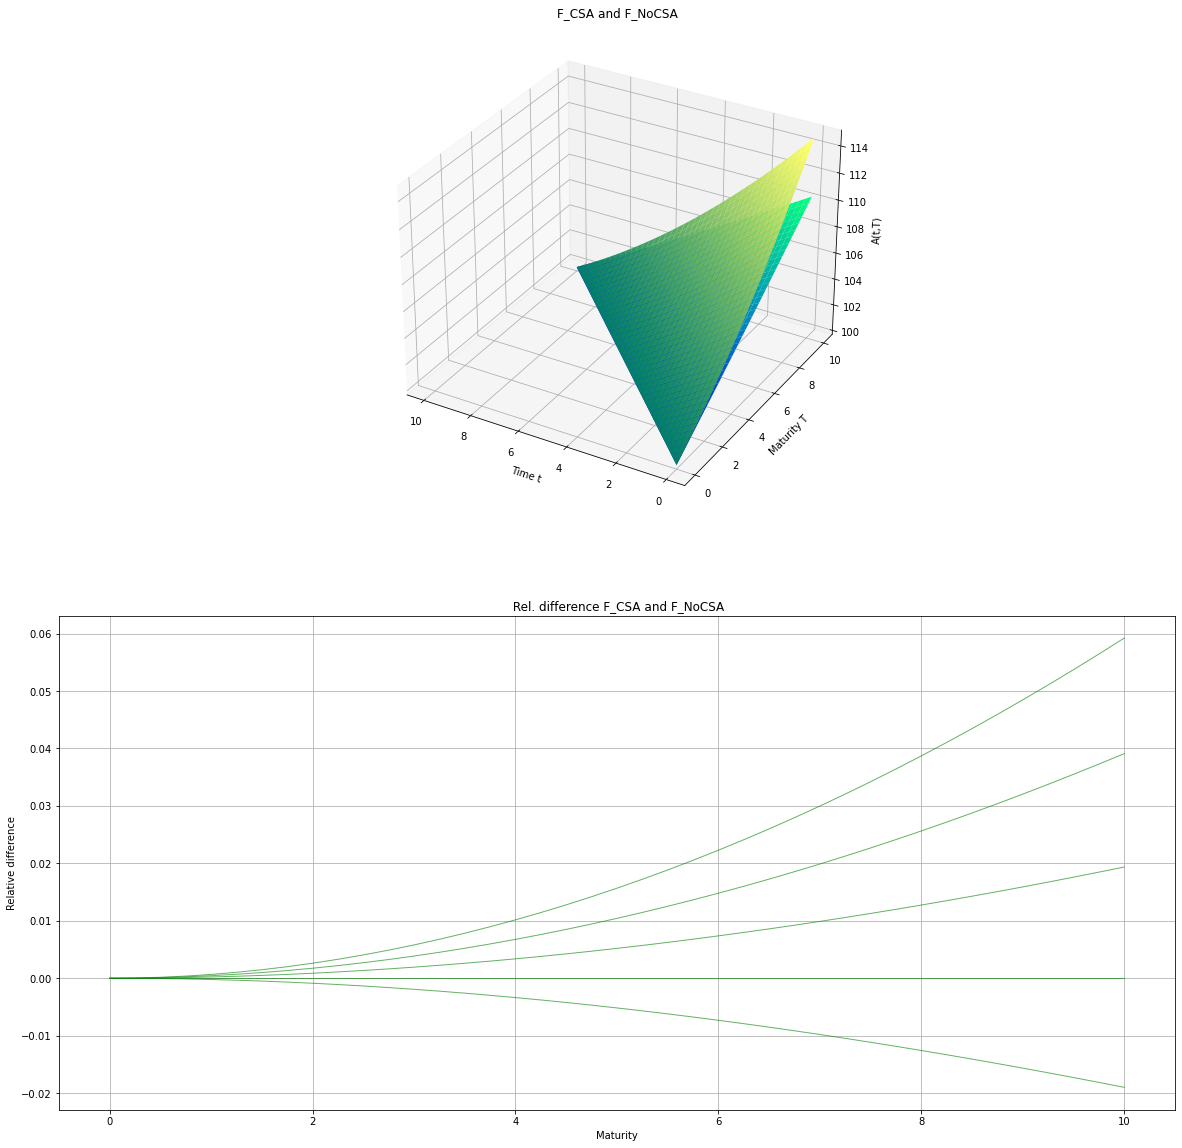

In [3]:
times = np.arange(0, 10+0.25, 0.25)
maturities = np.arange(0, 10+0.25, 0.25)
X, Y = np.meshgrid(times, maturities)
CSAValues = np.array([F_CSA(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
NoCSAValues = np.array([F_NoCSA(x,y,-0.2) for x,y in zip(np.ravel(X), np.ravel(Y))])

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(211, projection='3d')
ax.set_xlabel('Time t')
ax.set_ylabel('Maturity T')
ax.invert_xaxis()
ax.set_zlabel('A(t,T)')
surf = ax.plot_surface(X, Y, CSAValues.reshape(X.shape), alpha = 1, rstride=1, cstride=1, 
                       cmap= plt.cm.winter, linewidth=0.5, antialiased=True)

surf = ax.plot_surface(X, Y, NoCSAValues.reshape(X.shape), alpha = 1, rstride=1, cstride=1, 
                       cmap= plt.cm.summer, linewidth=0.5, antialiased=True)
ax.set_title("F_CSA and F_NoCSA", fontdict=None, loc=u'center')


ax2 = fig.add_subplot(212)
ax2.grid(True)


for rho in [-0.3,-0.2,-0.1,0,0.1]:
    def relDiff(T):
        return (F_NoCSA(0,T,rho)-F_CSA(0,T))/F_CSA(0,T)
    ax2.plot(maturities, [relDiff(mat) for mat in maturities], "r-", label='rho:'+str(rho),lw=1, alpha=0.6,color=['green','blue','red'][0])
ax2.set_xlabel('Maturity') 
ax2.set_ylabel('Relative difference')
ax2.set_title(" Rel. difference F_CSA and F_NoCSA", fontdict=None, loc=u'center')

# Distribution  of $F^{NoCSA}(t,T)$







$Q^F_T(S_T \in A\mathcal{F_t}) =E^{Q^C_T}(E^{Q^C_T}(\frac{M(T,T)}{M(t,T)}|\mathcal{F_t}) \alpha_1(t,T)|\mathcal{F_t}) \approx E^{Q^C_T}((\alpha_0(t,T) + \alpha_1(t,T) S_T)1_A S_T\mathcal{F_t} ) = \int_A((\alpha_0(t,T) + \alpha_1(t,T) s)s \cdot p^{Q^C_T}(s) ds)$

$\left(\begin{matrix} \alpha_0(t,T)\\\alpha_1(t,T) \end{matrix}\right)
=\left(\begin{matrix} 1-\alpha_1(t,T)F^{NoCSA}(t,T)\\\frac{F^{NoCSA}(t,T)-F^{CSA}(t,T)}{Var^{Q^C_t}(S_T)} \end{matrix}\right)=\left(\begin{matrix} 1-\alpha_1(t,T)F^{NoCSA}(t,T)\\\frac{F^{NoCSA}(t,T)-F^{CSA}(t,T)}{\exp((\sigma^S)^2-1)F^{CSA}(t,T)^2} \end{matrix}\right)$



$ p^{Q^F_T}(s) =(\alpha_0(t,T) + \alpha_1(t,T) s) \cdot p^{Q^C_T}(s)$







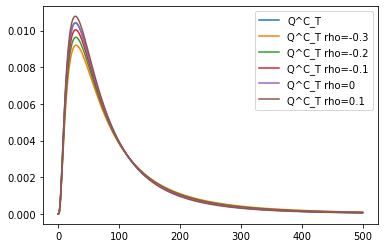

In [10]:
def alpha_1(t,T,rho):
    if t>T:
        return np.nan
    num = (F_NoCSA(t,T,rho)-F_CSA(t,T))
    denom =  math.exp(sigma_s*sigma_s-1) * F_CSA(t,T)*F_CSA(t,T)
    return num/denom
def alpha_0(t,T,rho):
    if t>T:
        return np.nan
    return 1 - alpha_1(t,T,rho) *F_NoCSA(t,T,rho)




def S(t):
   
    mu = math.log(S_0) - sigma_s*sigma_s*t/2
    sigma = sigma_s*sigma_s*t
    l = lognorm(s=sigma, loc=0, scale=math.exp(mu))
    return l
   
T=10

plt.plot(np.arange(0,500,1), [S(T).pdf(s) for s in np.arange(0,500,1)],label="Q^C_T")
for rho in [-0.3,-0.2,-0.1,0,0.1]:
    plt.plot(np.arange(0,500,1), [S(T).pdf(s)*(alpha_0(0,T,rho) +alpha_1(0,T,rho)*s) 
                                    for s in np.arange(0,500,1)],label="Q^C_T rho="+str(rho))
plt.legend()

    

# Simulation


In [5]:
def S(t):
    S_0*exp((r_c-sigma_s*sigma_s/2)*t)
    
def s_F(t):
    S_0*exp((r_c-sigma_s*sigma_s/2)*t)

In [6]:
def F(t,T):
    I = lambda s: s*s*3
    return   lambda s: integrate.quad(I,t,T)
print(type(F))
print (F(0,1)(1))

<class 'function'>
(1.0, 1.1102230246251565e-14)


In [7]:
#t=1
#print(lognorm.__doc__)
#print(lognorm(100,math.log(S_0) - sigma_s*sigma_s*t/2).mean)

In [8]:
import math
from scipy.stats import lognorm
mu = 2
sigma = 2
l = lognorm(s=sigma, loc=0, scale=math.exp(mu))
print("mean: %.5f  stddev: %.5f" % (l.mean(), l.std()))


mean: 54.59815  stddev: 399.71719


(0.4804603274024632, -0.02553461411124458, 1.0050852906090544)


AttributeError: 'Rectangle' object has no property 'normed'

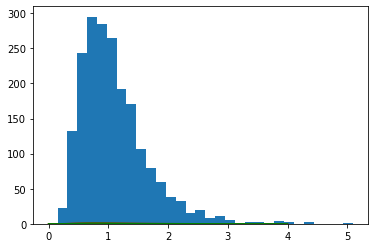

In [9]:
samp=lognorm(0.5,loc=0,scale=1).rvs(size=2000) # sample
param=lognorm.fit(samp) # fit the sample data
print(param) # does not coincide  with shape, loc, scale above!
x=np.linspace(0,4,100)
pdf_fitted = lognorm.pdf(x, param[0], loc=param[1], scale=param[2]) # fitted distribution
pdf = lognorm.pdf(x, 0.5, loc=0, scale=1) # original distribution
plt.plot(x,pdf_fitted,'r-',x,pdf,'g-')
plt.hist(samp,bins=30,normed=True,alpha=.3)

In [10]:
class ModelParameters:
    """
    Encapsulates model parameters
    """

    def __init__(self,
                 all_s0, all_time, all_delta, all_sigma, gbm_mu,
                 jumps_lamda=0.0, jumps_sigma=0.0, jumps_mu=0.0,
                 cir_a=0.0, cir_mu=0.0, all_r0=0.0, cir_rho=0.0,
                 ou_a=0.0, ou_mu=0.0,
                 heston_a=0.0, heston_mu=0.0, heston_vol0=0.0):
        # This is the starting asset value
        self.all_s0 = all_s0
        # This is the amount of time to simulate for
        self.all_time = all_time
        # This is the delta, the rate of time e.g. 1/252 = daily, 1/12 = monthly
        self.all_delta = all_delta
        # This is the volatility of the stochastic processes
        self.all_sigma = all_sigma
        # This is the annual drift factor for geometric brownian motion
        self.gbm_mu = gbm_mu
        # This is the probability of a jump happening at each point in time
        self.lamda = jumps_lamda
        # This is the volatility of the jump size
        self.jumps_sigma = jumps_sigma
        # This is the average jump size
        self.jumps_mu = jumps_mu
        # This is the rate of mean reversion for Cox Ingersoll Ross
        self.cir_a = cir_a
        # This is the long run average interest rate for Cox Ingersoll Ross
        self.cir_mu = cir_mu
        # This is the starting interest rate value
        self.all_r0 = all_r0
        # This is the correlation between the wiener processes of the Heston model
        self.cir_rho = cir_rho
        # This is the rate of mean reversion for Ornstein Uhlenbeck
        self.ou_a = ou_a
        # This is the long run average interest rate for Ornstein Uhlenbeck
        self.ou_mu = ou_mu
        # This is the rate of mean reversion for volatility in the Heston model
        self.heston_a = heston_a
        # This is the long run average volatility for the Heston model
        self.heston_mu = heston_mu
        # This is the starting volatility value for the Heston model
        self.heston_vol0 = heston_vol0


In [11]:
mp = ModelParameters(all_s0=1000,
                     all_r0=0.5,
                     all_time=800,
                     all_delta=0.00396825396,
                     all_sigma=0.125,
                     gbm_mu=0.058,
                     jumps_lamda=0.00125,
                     jumps_sigma=0.001,
                     jumps_mu=-0.2,
                     cir_a=3.0,
                     cir_mu=0.5,
                     cir_rho=0.5,
                     ou_a=3.0,
                     ou_mu=0.5,
                     heston_a=0.25,
                     heston_mu=0.35,
                     heston_vol0=0.06125)

paths = 15


In [37]:
def heston_construct_correlated_path(param, brownian_motion_one):
    """
    This method is a simplified version of the Cholesky decomposition method for just two assets. It does not make use
    of matrix algebra and is therefore quite easy to implement.
    :param param: model parameters object
    :return: a correlated brownian motion path
    """
    # We do not multiply by sigma here, we do that in the Heston model
    sqrt_delta = math.sqrt(param.all_delta)
    # Construct a path correlated to the first path
    brownian_motion_two = []
    for i in range(param.all_time - 1):
        term_one = param.cir_rho * brownian_motion_one[i]
        term_two = math.sqrt(1 - math.pow(param.cir_rho, 2.0)) * random.normalvariate(0, sqrt_delta)
        brownian_motion_two.append(term_one + term_two)
    return np.array(brownian_motion_one), np.array(brownian_motion_two)

def get_correlated_geometric_brownian_motions(param, correlation_matrix, n):
    """
    This method can construct a basket of correlated asset paths using the Cholesky decomposition method
    :param param: model parameters object
    :param correlation_matrix: nxn correlation matrix
    :param n: the number of assets i.e. the number of paths to return
    :return: n correlated log return geometric brownian motion processes
    """
    assert isinstance(param, ModelParameters)
    decomposition = scipy.linalg.cholesky(correlation_matrix, lower=False)
    uncorrelated_paths = []
    sqrt_delta_sigma = math.sqrt(param.all_delta) * param.all_sigma
    # Construct uncorrelated paths to convert into correlated paths
    for i in range(param.all_time):
        uncorrelated_random_numbers = []
        for j in range(n):
            uncorrelated_random_numbers.append(random.normalvariate(0, sqrt_delta_sigma))
        uncorrelated_paths.append(numpy.array(uncorrelated_random_numbers))
    uncorrelated_matrix = numpy.matrix(uncorrelated_paths)
    correlated_matrix = uncorrelated_matrix * decomposition
    assert isinstance(correlated_matrix, np.matrix)
    # The rest of this method just extracts paths from the matrix
    extracted_paths = []
    for i in range(1, n + 1):
        extracted_paths.append([])
    for j in range(0, len(correlated_matrix)*n - n, n):
        for i in range(n):
            extracted_paths[i].append(correlated_matrix.item(j + i))
    return extracted_paths



In [38]:
def cox_ingersoll_ross_heston(param):
    """
    This method returns the rate levels of a mean-reverting cox ingersoll ross process. It is used to model interest
    rates as well as stochastic volatility in the Heston model. Because the returns between the underlying and the
    stochastic volatility should be correlated we pass a correlated Brownian motion process into the method from which
    the interest rate levels are constructed. The other correlated process is used in the Heston model
    :param param: the model parameters objects
    :return: the interest rate levels for the CIR process
    """
    # We don't multiply by sigma here because we do that in heston
    sqrt_delta_sigma = math.sqrt(param.all_delta) * param.all_sigma
    brownian_motion_volatility = np.random.normal(loc=0, scale=sqrt_delta_sigma, size=param.all_time)
    a, mu, zero = param.heston_a, param.heston_mu, param.heston_vol0
    volatilities = [zero]
    for i in range(1, param.all_time):
        drift = a * (mu - volatilities[i-1]) * param.all_delta
        randomness = math.sqrt(max(volatilities[i - 1], 0.05)) * brownian_motion_volatility[i - 1]
        volatilities.append(max(volatilities[i - 1], 0.05) + drift + randomness)
    return np.array(brownian_motion_volatility), np.array(volatilities)





In [41]:




def heston_model_levels(param):
    """
    NOTE - this method is dodgy! Need to debug!
    The Heston model is the geometric brownian motion model with stochastic volatility. This stochastic volatility is
    given by the cox ingersoll ross process. Step one on this method is to construct two correlated GBM processes. One
    is used for the underlying asset prices and the other is used for the stochastic volatility levels
    :param param: model parameters object
    :return: the prices for an underlying following a Heston process
    """
    assert isinstance(param, ModelParameters)
    # Get two correlated brownian motion sequences for the volatility parameter and the underlying asset
    # brownian_motion_market, brownian_motion_vol = get_correlated_paths_simple(param)
    brownian, cir_process = cox_ingersoll_ross_heston(param)
    brownian, brownian_motion_market = heston_construct_correlated_path(param, brownian)

    heston_market_price_levels = [param.all_s0]
    for i in range(1, param.all_time):
        drift = param.gbm_mu * heston_market_price_levels[i - 1] * param.all_delta
        vol = cir_process[i - 1] * heston_market_price_levels[i - 1] * brownian_motion_market[i - 1]
        heston_market_price_levels.append(heston_market_price_levels[i - 1] + drift + vol)
    return np.array(heston_market_price_levels), np.array(cir_process)



In [46]:
def plot_stochastic_processes(processes, title):
    """
    This method plots a list of stochastic processes with a specified title
    :return: plots the graph of the two
    """
    plt.style.use(['bmh'])
    fig, ax = plt.subplots(1)
    fig.suptitle(title, fontsize=16)
    ax.set_xlabel('Time, t')
    ax.set_ylabel('Simulated Asset Price')
    x_axis = np.arange(0, len(processes[0]), 1)
    for i in range(len(processes)):
        plt.plot(x_axis, processes[i])
    plt.show()


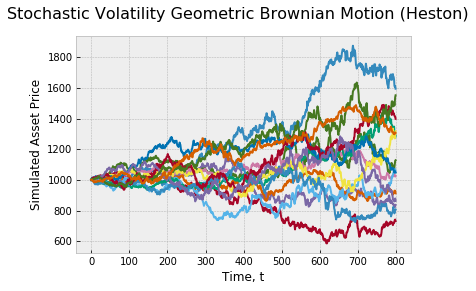

In [47]:
stochastic_volatility_examples = []
for i in range(paths):
    stochastic_volatility_examples.append(heston_model_levels(mp)[0])
plot_stochastic_processes(stochastic_volatility_examples, "Stochastic Volatility Geometric Brownian Motion (Heston)")
